In [ ]:
##### 머신러닝

# 머신러닝은 종종 인공지능(AI)의 하위 분야로 분류되지만, 
# 하지만, 머신러닝을 데이터 과학에 응용하는 경우에는 머신러닝을 데이터 모델을 구축하는 하나의 수단으로 이해하는게 더 도움이 된다.
# 근본적으로 머신러닝은 데이터를 이해하기 위해 수학적 모델을 구축하는 것과 관련이 있다.

In [ ]:
### 머신러닝의 범주

# (1) 지도학습(Supervised learning)
# 데이터의 측정된 feature과 데이터와 관련된 label 사이의 관계를 모델링 하는 것.
# 따라서, 이 모델이 결정되고 나면 새 데이터에 레이블을 적용할 수 있다.
# ex) classification, regression 등

# (2) 비지도학습(Unsupervised learninig)
# 레이블을 참조하지 않고 데이터세트의 feature를 모델링하는 것.
# ex) clustering, dimensionality reduction 등

# (3) 준지도학습(Semi-supervised learninig)
# 사용할 수 있는 레이블이 불완전할 때만 유용하다.

In [ ]:
##################################################################################################################################

In [2]:
##### Scikit-Learn (p394)

# Scikit-learn은 깔끔하고 일관되고 간결한 API와 매우 유용하고 완전한 온라인 문서가 특징이다.

# 1. 일관성 : 모든 객체는 일관된 문서를 갖춘 제한된 메서드 집합에서 비롯된 공통 인터페이스를 공유한다.
# 2. 검사(Inspection) : 모든 지정된 모수값은 public(공개) 속성으로 노출된다.
# 3. 제한된 객체 계층구조 : 알고리즘만 파이썬 클래스에 의해 표현되고,
#                           데이터셋은 표준 포맷(numpy array, pandas dataframe, SciPy sparse matrix)으로 표현되며
#                           매개변수명은 표준 파이썬 문자열을 사용한다.
# 4. 구성 : 많은 머신러닝 작업은 기본 알고리즘의 시퀀스로 나타낼 수 있다.
# 5. 합리적인 기본값 : 모델이 사용자 지정 모수를 필요로 할 때, 라이브러리가 적절한 기본값을 정의한다.

# 일반적으로 Scikit-Learn Estimator API를 이용하는 단계
# 1. scikit-learn으로부터 적절한 추정기(estimator)클래스를 임포트한다.
# 2. 이 클래스를 원하는 값으로 인스턴스화해서, 모델의 초모수(hyperparameters)를 선택한다.
# 3. 데이터를 특징 배열과 대상 벡터로 배치한다.
# 4. 모델 인스턴스의 fit()메서드를 호출해 모델을 데이터에 적합시킨다.
# 5. 모델을 새 데이터에 적용한다.
#   - 지도학습의 경우 : 대체로 predict()메서드를 사용
#   - 비지도학습의 경우 : 대체로 transform()이나 predict()메서드를 사용

In [1]:
# 지도학습 예제 : 간단한 linear regression

import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x-1 + rng.randn(50)
plt.scatter(x,y);

(50, 1)
[1.9776566]
-0.9033107255311164


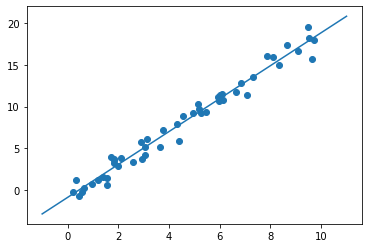

In [2]:
# 1. 모델 클래스를 선택한다
from sklearn.linear_model import LinearRegression

# 2. 클래스를 인스턴스화하고, 모델 초모수를 선택한다
model = LinearRegression(fit_intercept=True)
# 여기서는 fit_intercept 초모수를 사용해 절편을 적합시키도록 지정했다.

# 3. 데이터를 특징행렬과 대상 벡터로 배치한다.
X = x[:, np.newaxis]
print(X.shape)

# 4. 모델을 데이터에 적합시킨다,
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

# 5. 알려지지 않은 데이터에 대한 레이블을 예측한다.
xfit = np.linspace(-1,11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit, yfit);

In [3]:
# 지도학습 예제 : iris data classification

# iris 데이터 불러오기
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()
X_iris = iris.drop('species',axis=1)
y_iris = iris['species']

In [25]:
# 0. 이 예제에 대해서는 전에 본 적없는 데이터에 대해 모델을 평가해야 하므로, 데이터를 split한다.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

from sklearn.naive_bayes import GaussianNB    # 1. 모델 클래스 선택
model = GaussianNB()                           # 2. 클래스 인스턴스화
model.fit(Xtrain, ytrain)                      # 4. 모델을 데이터에 적합
y_model = model.predict(Xtest)                 # 5. 새 데이터에 대해 prediction

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

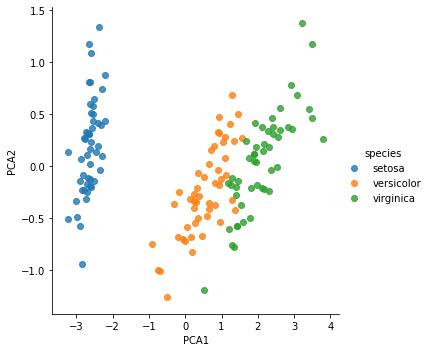

In [29]:
# 비지도학습 예제 : iris 차원

from sklearn.decomposition import PCA  # 1. 모델 클래스 선택
model = PCA(n_components = 2)           # 2. 초모수로 모델 인스턴스화
model.fit(X_iris)                       # 3. 데이터에 적합, y는 지정 안함!!!!!
X_2D = model.transform(X_iris)          # 4. 데이터를 2차원으로 변환

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

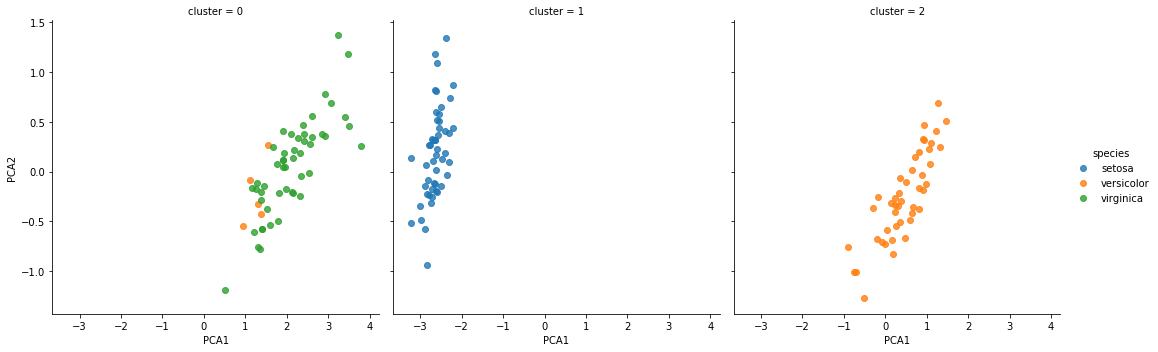

In [34]:
# 비지도 학습 예제 : iris clustering
from sklearn.mixture import GaussianMixture         # 1. 모델 클래스 선택
model = GaussianMixture(n_components=3, covariance_type='full')  # 2. 초모수로 모델 인스턴스화
model.fit(X_iris)                                    # 3. 데이터에 적합, y는 지정하지 않음!!
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

In [67]:
# 응용 : mnist data

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
# 해석 : 3차원 배열로, 1797개의 sample을 갖고, 각 sample은 8x8 그리드로 구성돼 있다.

(1797, 8, 8)

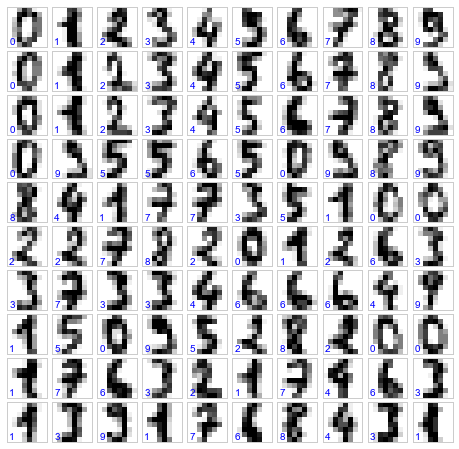

In [84]:
# 처음 100개를 시각화
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='blue')

In [80]:
# 차원 축소

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

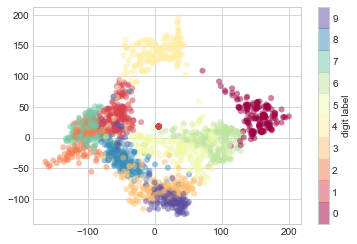

In [81]:
# 데이터를 plotting해서 그 구조로부터 학습할 내용이 있는지 확인
# 여기서는 등거리 사상(Isomap)이라는 다양체 학습 알고리즘(manifold learning)을 사용해 2차원으로 변환함

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [82]:
# 숫자 분류 - Gaussian Naive Bayes 모델 적합

from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)
# 높은 정확도를 보이지만 이 0.83만으로는 어디에서 제대로 예측을 못한 것인지 알 수 없다.
# 이를 알아내는 좋은 방법은 오차행렬(confusion matrix)을 사용하는 것이다.

0.8333333333333334

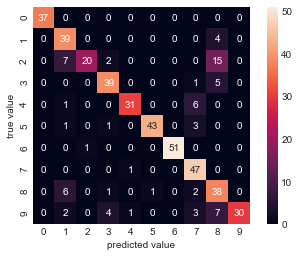

In [83]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');
# 이 그림을 통해 레이블이 잘못 분류된 점들이 주로 어디에 있는지 알수 있다..

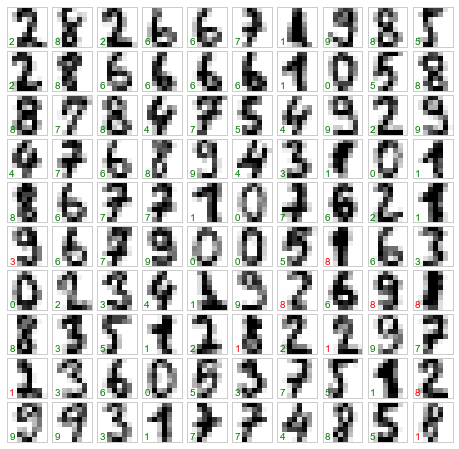

In [85]:
# 모델의 특성에 대한 직관을 얻는 또 다른 방법은 모델이 예측한 레이블로 입력 데이터를 다시 플로팅하는 것이다.
# 예제에서는 올바른 레이블에 녹색, 잘못된 레이블에 빨간색을 사용하였다.

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')

In [ ]:
##################################################################################################################################

In [86]:
##### 초모수와 모델 검증 (p412)

# 잘못된 방식의 순진한 모델 검증
#   => 데이터 전부를 통해 모델을 학습시키고, 그 모델을 사용해 이미 알고 있는 데이터의 레이블을 예측하면 정확도는 100%가 나옴

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [ ]:
# 올바른 방식으로 model validation을 하려면 검정표본(holdout set)을 사용하면 된다.
# 즉, 모델의 train data에서 데이터의 일부를 빼내 그것을 모델 성능을 확인하는 검정표본으로 사용하는 것이다.
# 위에서 scikit-learn의 train_test_split 유틸리티를 사용한것 처럼 하면 된다.

from sklearn.cross_validation import train_test_split
# 데이터를 각각 50%로 나눔
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.5)
# 모델을 이 가운데 하나의 데이터 집합에 적합시킴
model.fit(X1, y1)
# 모델을 두번째 데이터 집합으로 검증함
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

In [91]:
# 위 방식의 단점은 모델을 훈련시킬 데이터의 일부를 잃게 되는 것이다.
#   => 이 문제를 해결하는 한 가지 방법은 교차 검증(cross-validatino)을 사용하는 것이다.
#      즉, 데이터의 하위 집합이 train data와 test data로 사용되도록 적합을 수행하는 것임.

# 5 fold cross validation 시행
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [94]:
# cv의 극단적인 case인 단일 관측치 제거 방식(leave-one-out) 교차검증
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores)
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.96


In [ ]:
### 최적의 모델 선택하기

# 근본적으로 최고의 모델을 선택하는 것은 편햐과 분산 사이의 트레이드오프에서 가장 효율적인 점을 찾는 것임
# 과소적합(underfit)은 고편향(high biased)의 문제를 일으켜서, train data의 accuracy가 떨어지고
# 과대적합(overfit)은 고분산(high variance)의 문제를 일으켜서, test data의 accuracy가 떨어진다

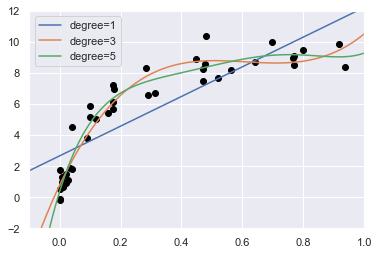

In [5]:
# 검증곡선(validation curve)
# x축은 모델 복잡도 : 복잡할수록 과대 적합이 됨
# y축은 모델 점수 : 검증점수의 최대값을 갖는 복잡도가 좋음

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# 모델을 적합할 데이터 만들기
import numpy as np
def make_data(N, err=1.0, rseed=1):
    # 임의로 데이터 표본 만들기
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

# 데이터와 함께 여러 차수의 다항식 적합을 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

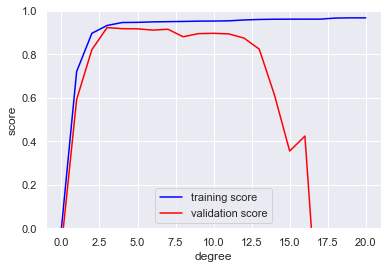

In [8]:
# 해석 : 몇 차 다항식이 편향과 분산의 적절한 trade off를 제공하는가? => 검증곡선을 시각화 해보기

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
# 3차 다항식이 검증곡선에서 최적의 score를 나타내는 것을 확인할 수 있음

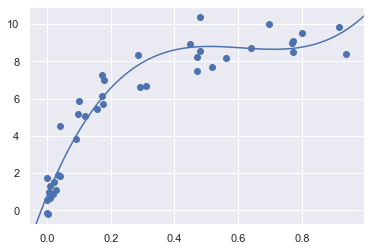

In [9]:
# 원본 데이터에 3차 다항식 적합
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

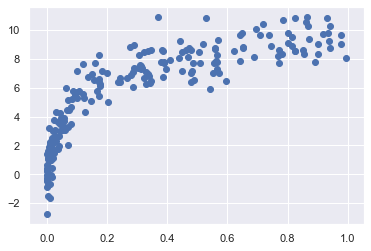

In [10]:
### 학습 곡선

# 위의 데이터보다 5배 더 큰 데이터
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

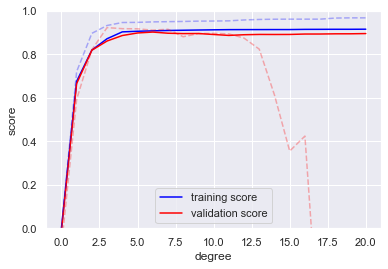

In [11]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
# 실선은 데이터가 큰 경우 / 점선은 위의 데이터 개수가 작은 경우
# 데이터가 큰 경우가 훨씬 더 복잡한 모델을 지원할 수 있다.
# => 따라서, 검증 곡선은 모델 복잡도 뿐만 아니라 훈련 데이터의 점 개수에 따라 결정된다.
# training data set의 크기에 따른 training score/validation score의 플롯을 학습곡선이라고 한다.

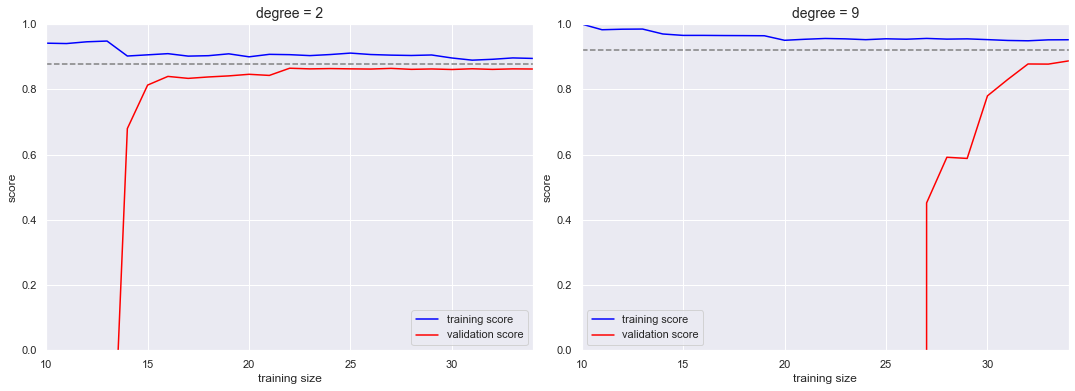

In [13]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

# 해석 : 왼쪽은 낮은 복잡도의 모델, 오른쪽은 높은 복잡도의 모델
# 학습곡선이 이미 수렴한 경우라면(즉 training 곡선과 validation 곡선이 이미 서로 가까울 때)
#       트레이닝 데이터를 더 추가한다고 해서 적합도가 눈에 띄게 개선되지는 않는다.
# 수렴된 점수를 증가시ㅣ는 유일한 방법은 일반적으로 더 복잡한 모델을 사용하는 것이다.

In [ ]:
##################################################################################################################################

In [ ]:
##### 특징 공학 (p429)

# 앞의 모든 예제는 깔끔한 형식의 수치 데이터를 사용한다고 가정했다. but, 현실세계에서 이런 데이터를 접하는 경우는 드물다.
# 이 점을 생각할 때 실제로 머신러닝에서 중요한 단계 중 하나는 특징 공학(feature engineering)이다.
# 특징 공학이란 : 문제에 대해 가지고 있는 정보를 모두 취해 특징 행렬을 구축하는데 사용할 수 있는 숫자로 변환하는 것이다.
# 이 절차는 임의의 데이터를 벡터로 전환하기 때문에 벡터화(vectorization)라고 하는 경우가 많다.

In [14]:
### (1) 범주 특징

# 원-핫 인코딩(one-hot encoding) : 해당 범주의 유무를 1이나 0으로 나타내는 추가 열을 생성하는 것.
# 데이터가 딕셔너리의 리스트 형태라면, scikit-learn의 DictVectorizer를 사용해 이 작업을 수행한다.

data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [15]:
vec.get_feature_names()
# 이것을 통해 각 열의 의미를 확인할 수 있다.

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [ ]:
# 이 방식의 한 가지 단점은 해당 범주에 들어갈 수 있는 값이 많은 경우 데이터세트의 크기가 엄청나게 커질수 있다는 것이다,
# 그러나 인코딩된 데이터가 대부분 0이기 때문에 sparse한 결과가 매우 효율적인 해결책이 될 수 있다.

In [16]:
### (2) 텍스트 특징

# 텍스트를 인코딩하는 가장 간단한 방법 중 하나는 word count를 이용하는 것이다.
sample = ['problem of evil', 'evil queen', 'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [17]:
# 위의 희박행렬 X를 얻었지만, 이를 레이블이 있는 열로 이뤄진 DataFrame으로 전환하면 검사하기가 더 쉬워진다
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
# 그러나 이 방법은, 원시 단어 개수가 매우 자주 등장하는 단어에 너무 많은 가중치를 부여하는 특징을 갖고 있다.

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [18]:
# 이것을 해결하는 한 가지 방법은, 단어가 문서에서 얼마나 자주 등장하느냐에 따라 단어 수에 가중치를 부여하는 TF-IDF기법이다
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [ ]:
### (3) 이미지 특징

# 가장 간단한 방식은, 픽셀값 자체를 사용하는 것이다.
# 그러나 응용 프로그램에 다라 그러한 방식은 최적이 아닐 수 있다.
# 이미지에 대한 특징 추출 기법을 요약하는 것은 이번 절의 범위를 넘어서는 일

In [ ]:
### (4) 유도 특징

# 입력 특징으로부터 수학적으로 유도된 특징이 있다.
# 앞에 예제에서, 모델을 바꾸지 않고 입력값을 변환해서 선형 회귀를 다항식 회귀로 바꿀수 있음을 확인했다.
# 이를 때로는 기저 함수 회귀(basis function regression)라고 한다.

# 이처럼, 모델을 바꾸지 않고 입력값을 변환해서 모델을 개선한다는 개념은 수많은 더 강력한 머신러닝 방식에서는 기본이다
# 더 일반적으로 말하면, 이것은 커널법(kernel method)이라는 강력한 기법들이 탄생하게 된 동기가 되었다.

In [20]:
### (5) 누락 데이터의 대체

# 누락된 값을 대체(imputation)하는 기법도 특징 공학이 필요한 또 다른 상황이다.
# 간단한 방식부터, 정교한 방법까지 있는데 정교한 방법은 그 응용 분야에 특화되는 경향이 있으므로 여기서는 다루지 않는다
# 간단한 기본 대체 방식의 경우, scikit-learn의 imputer 클래스를 사용하면 된다.
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [23]:
### (6) 특징 파이프라인

# 위의 여러 단계들을 하나로 묶고자 할 때 처리 파이프라인이 필요할 수 있다.
# 결측치 대체 -> 유도 특징을 이용한 형태 전환 -> 선형 회귀 적합의 과정을 한번에 할 수 있다.
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'), PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
